In [96]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from pathlib import Path
import numpy as np
import warnings
warnings.filterwarnings("ignore")

sns.set()
sns.set_theme(style="ticks")

In [13]:
def addGenIdx(df: pd.DataFrame, idx: int):

     genIdx = [f'{idx}' for x in range(len(df))]
     insert_index = 0
     insert_colname = 'Gen'
     insert_values = genIdx # this can be a numpy array too
     df.insert(loc=insert_index, column=insert_colname, value=insert_values)
     return df

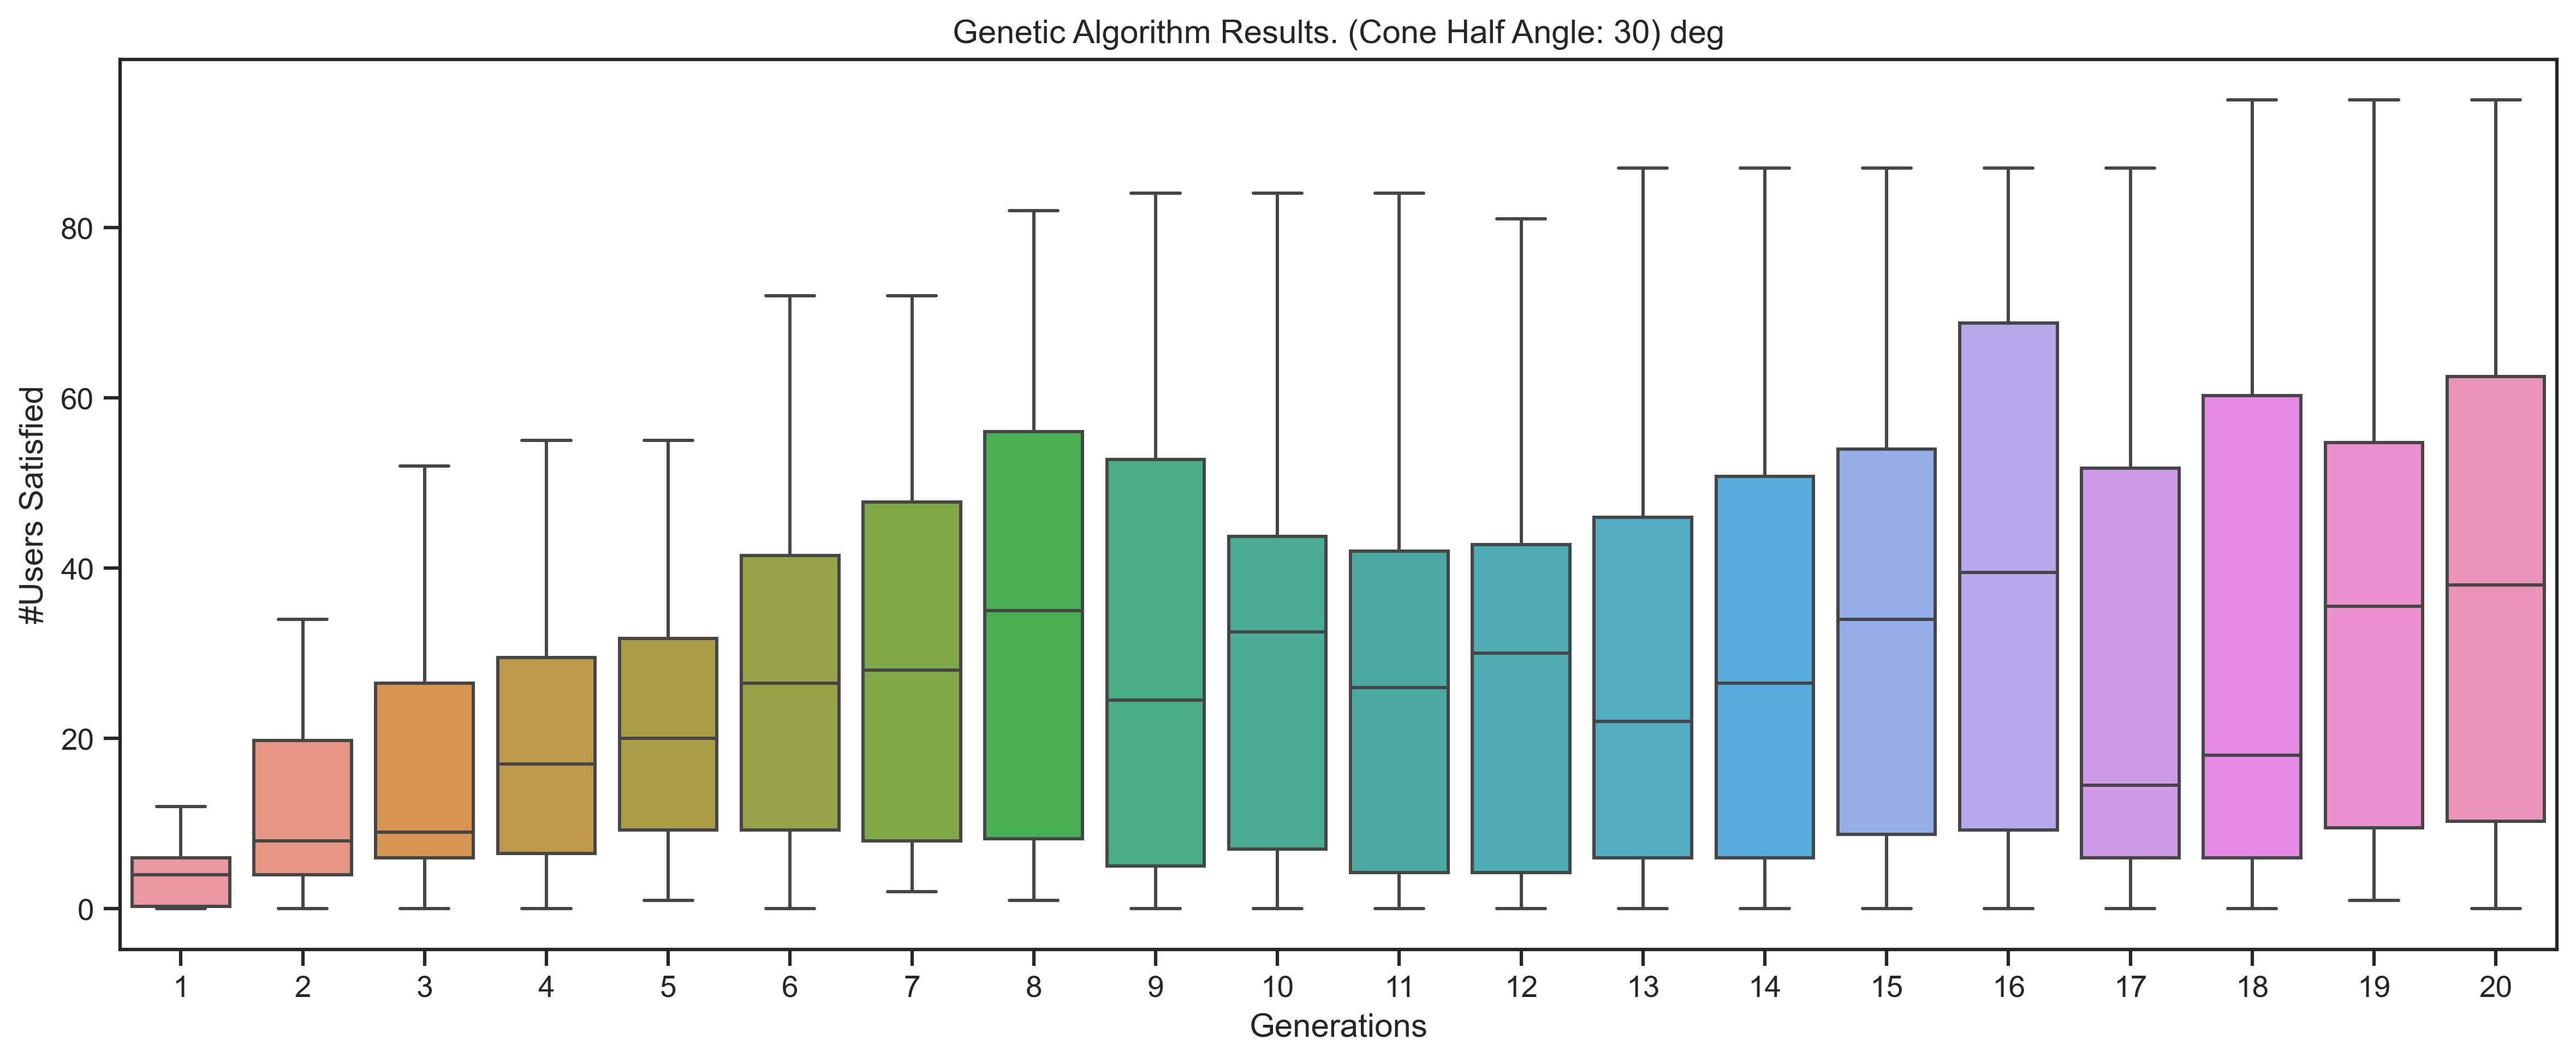

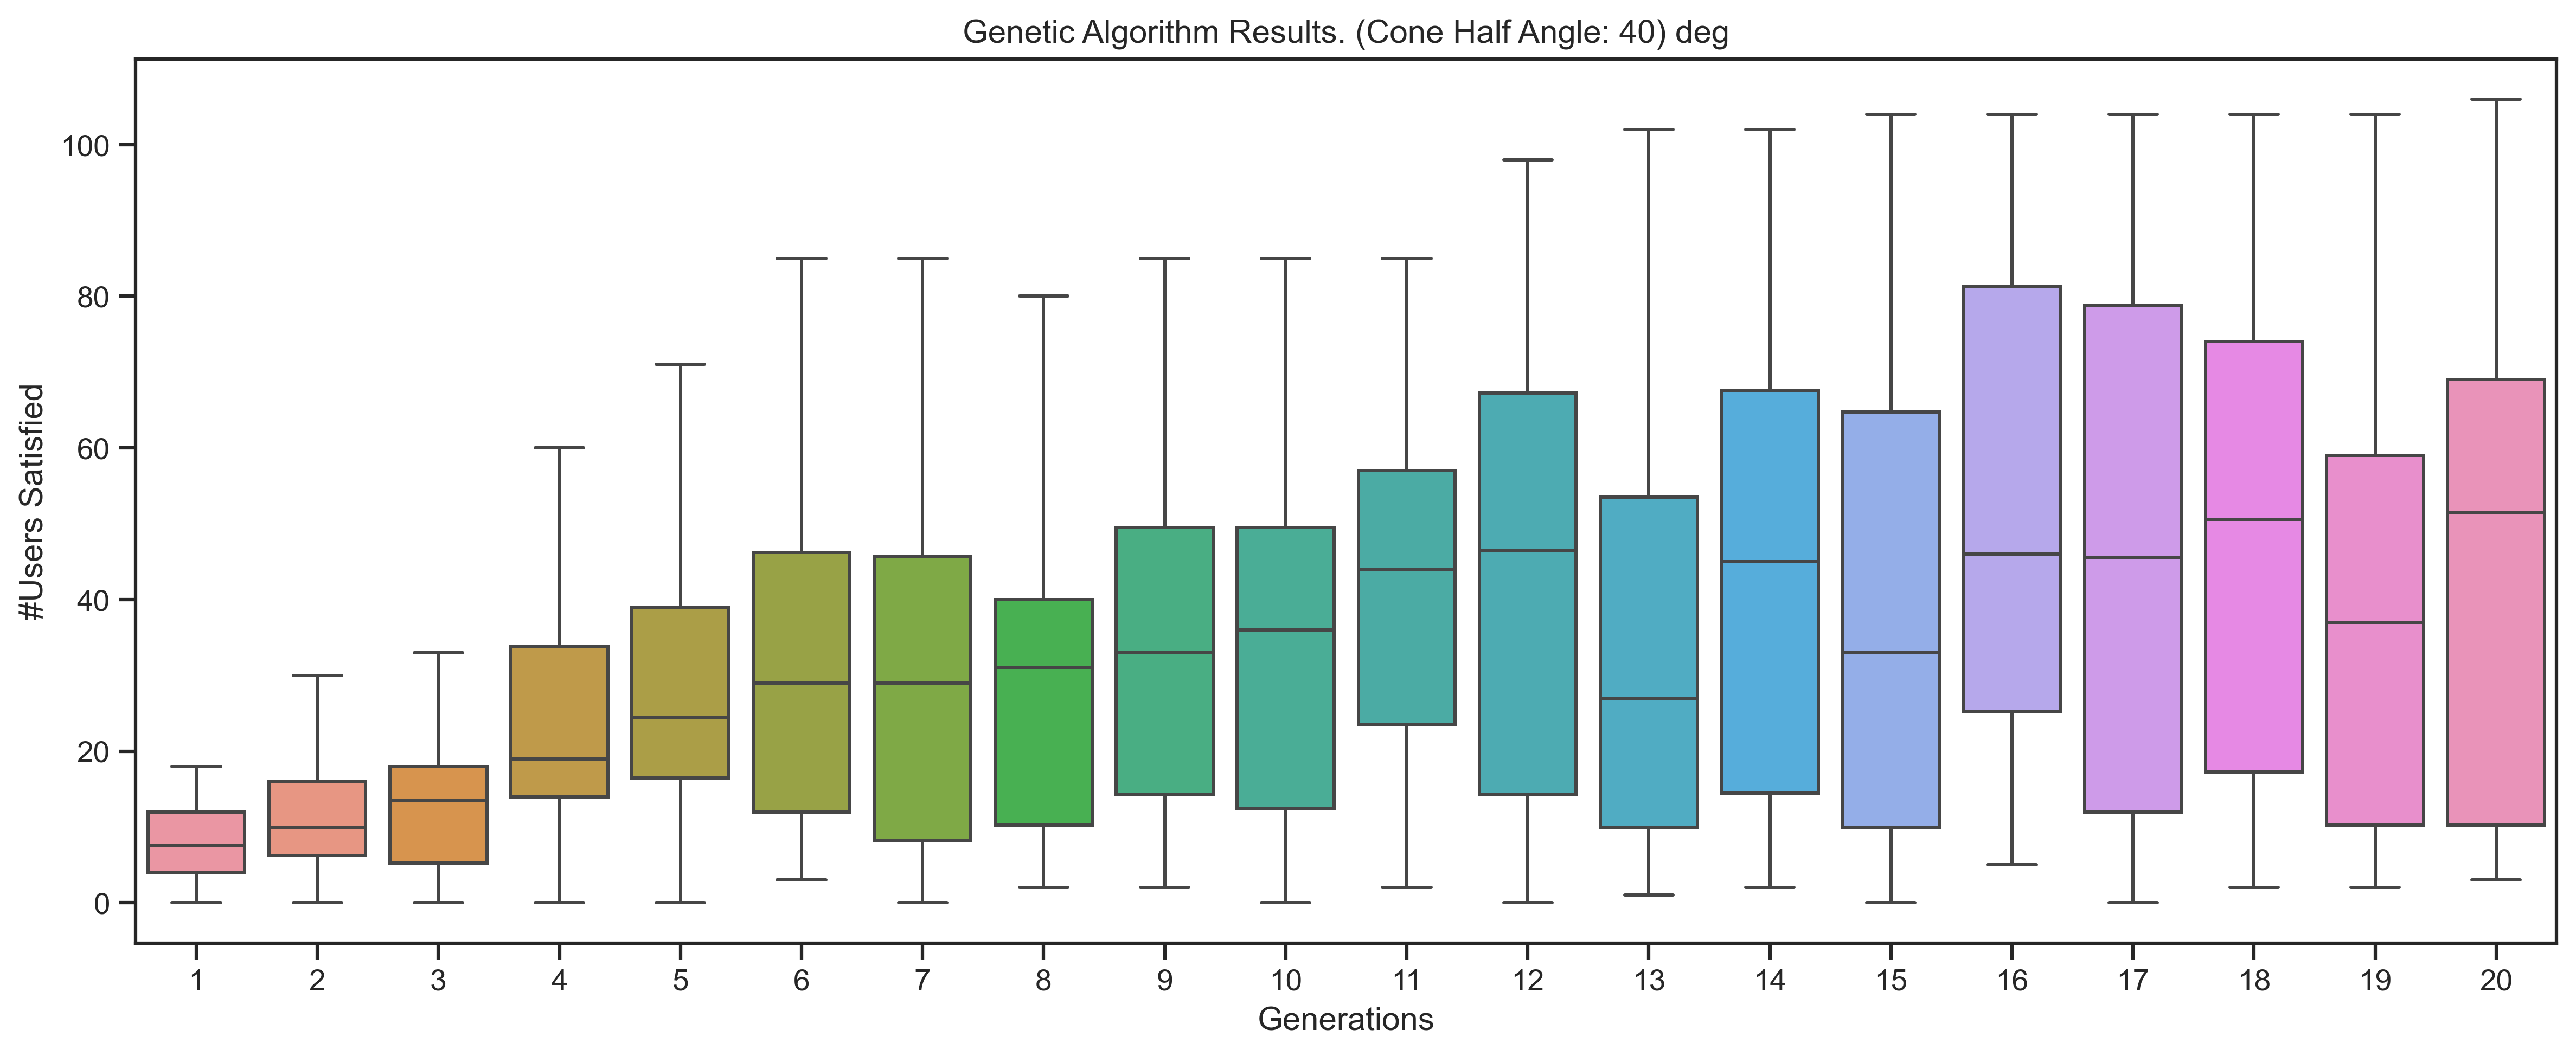

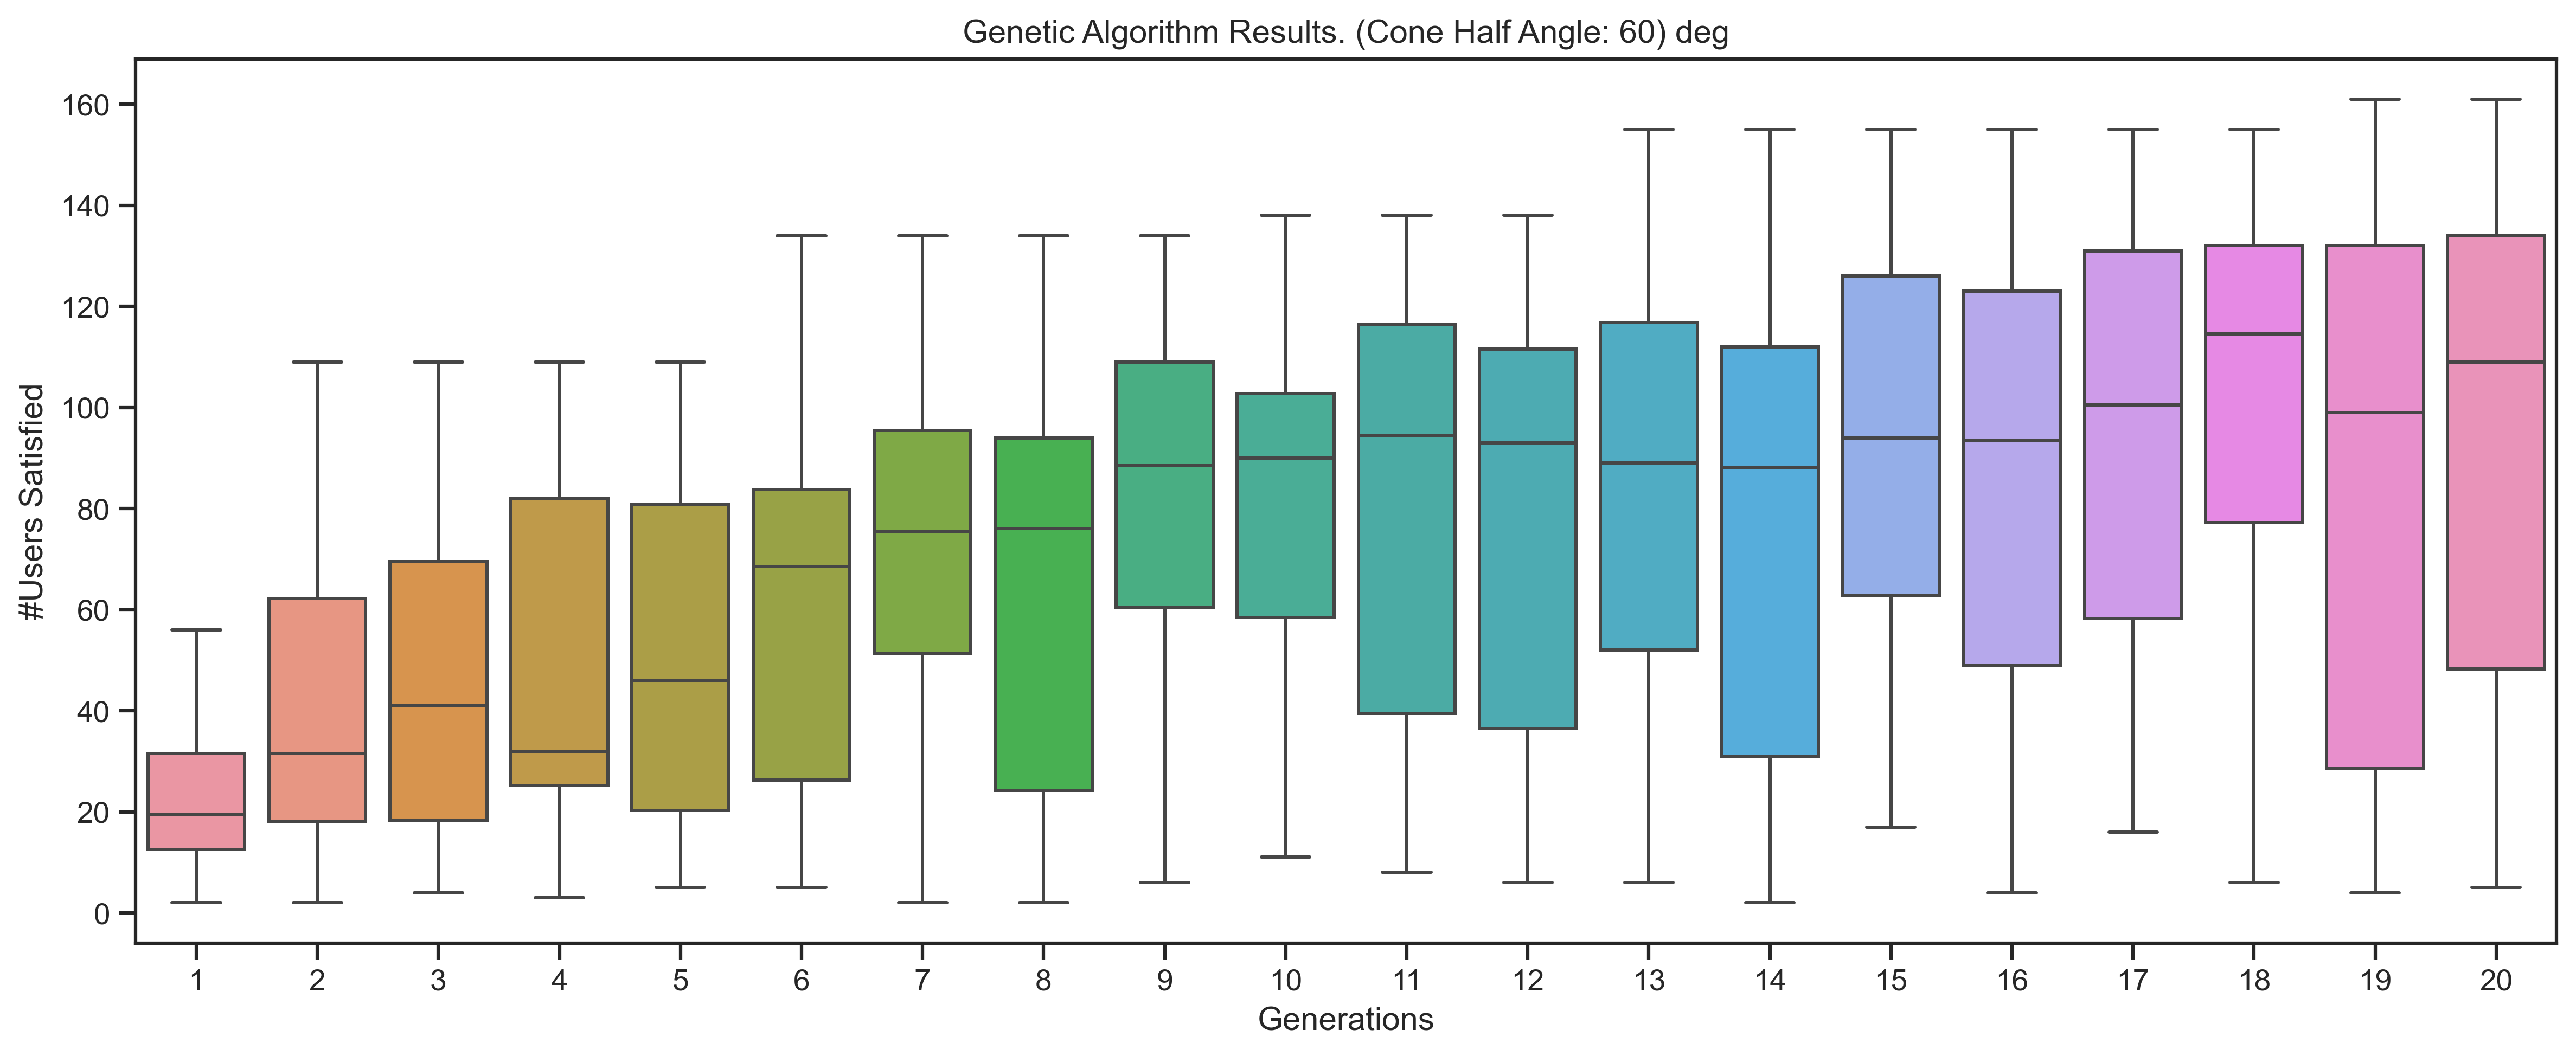

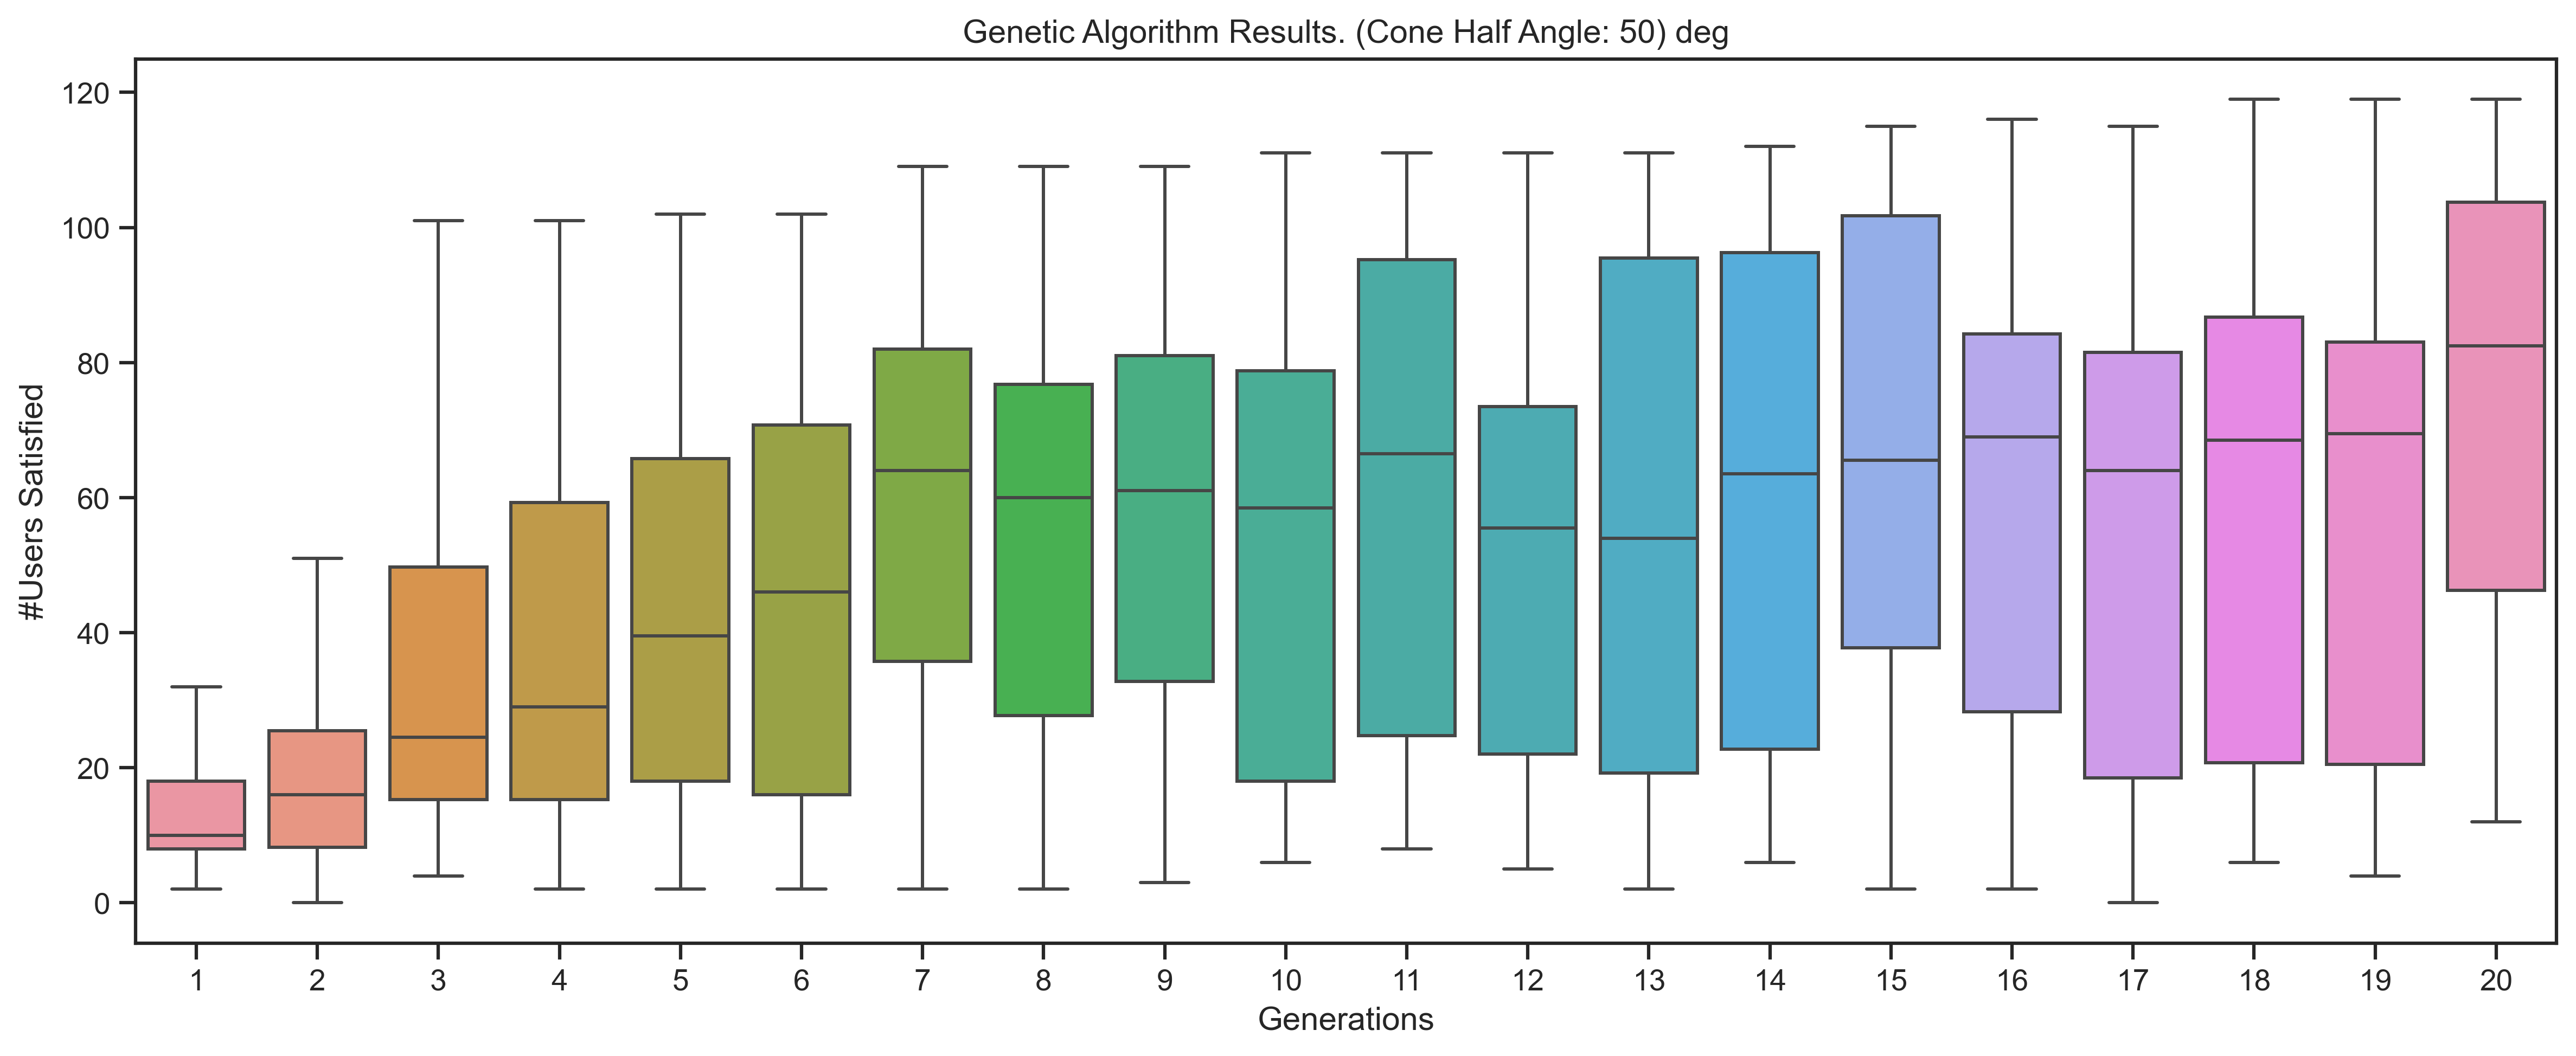

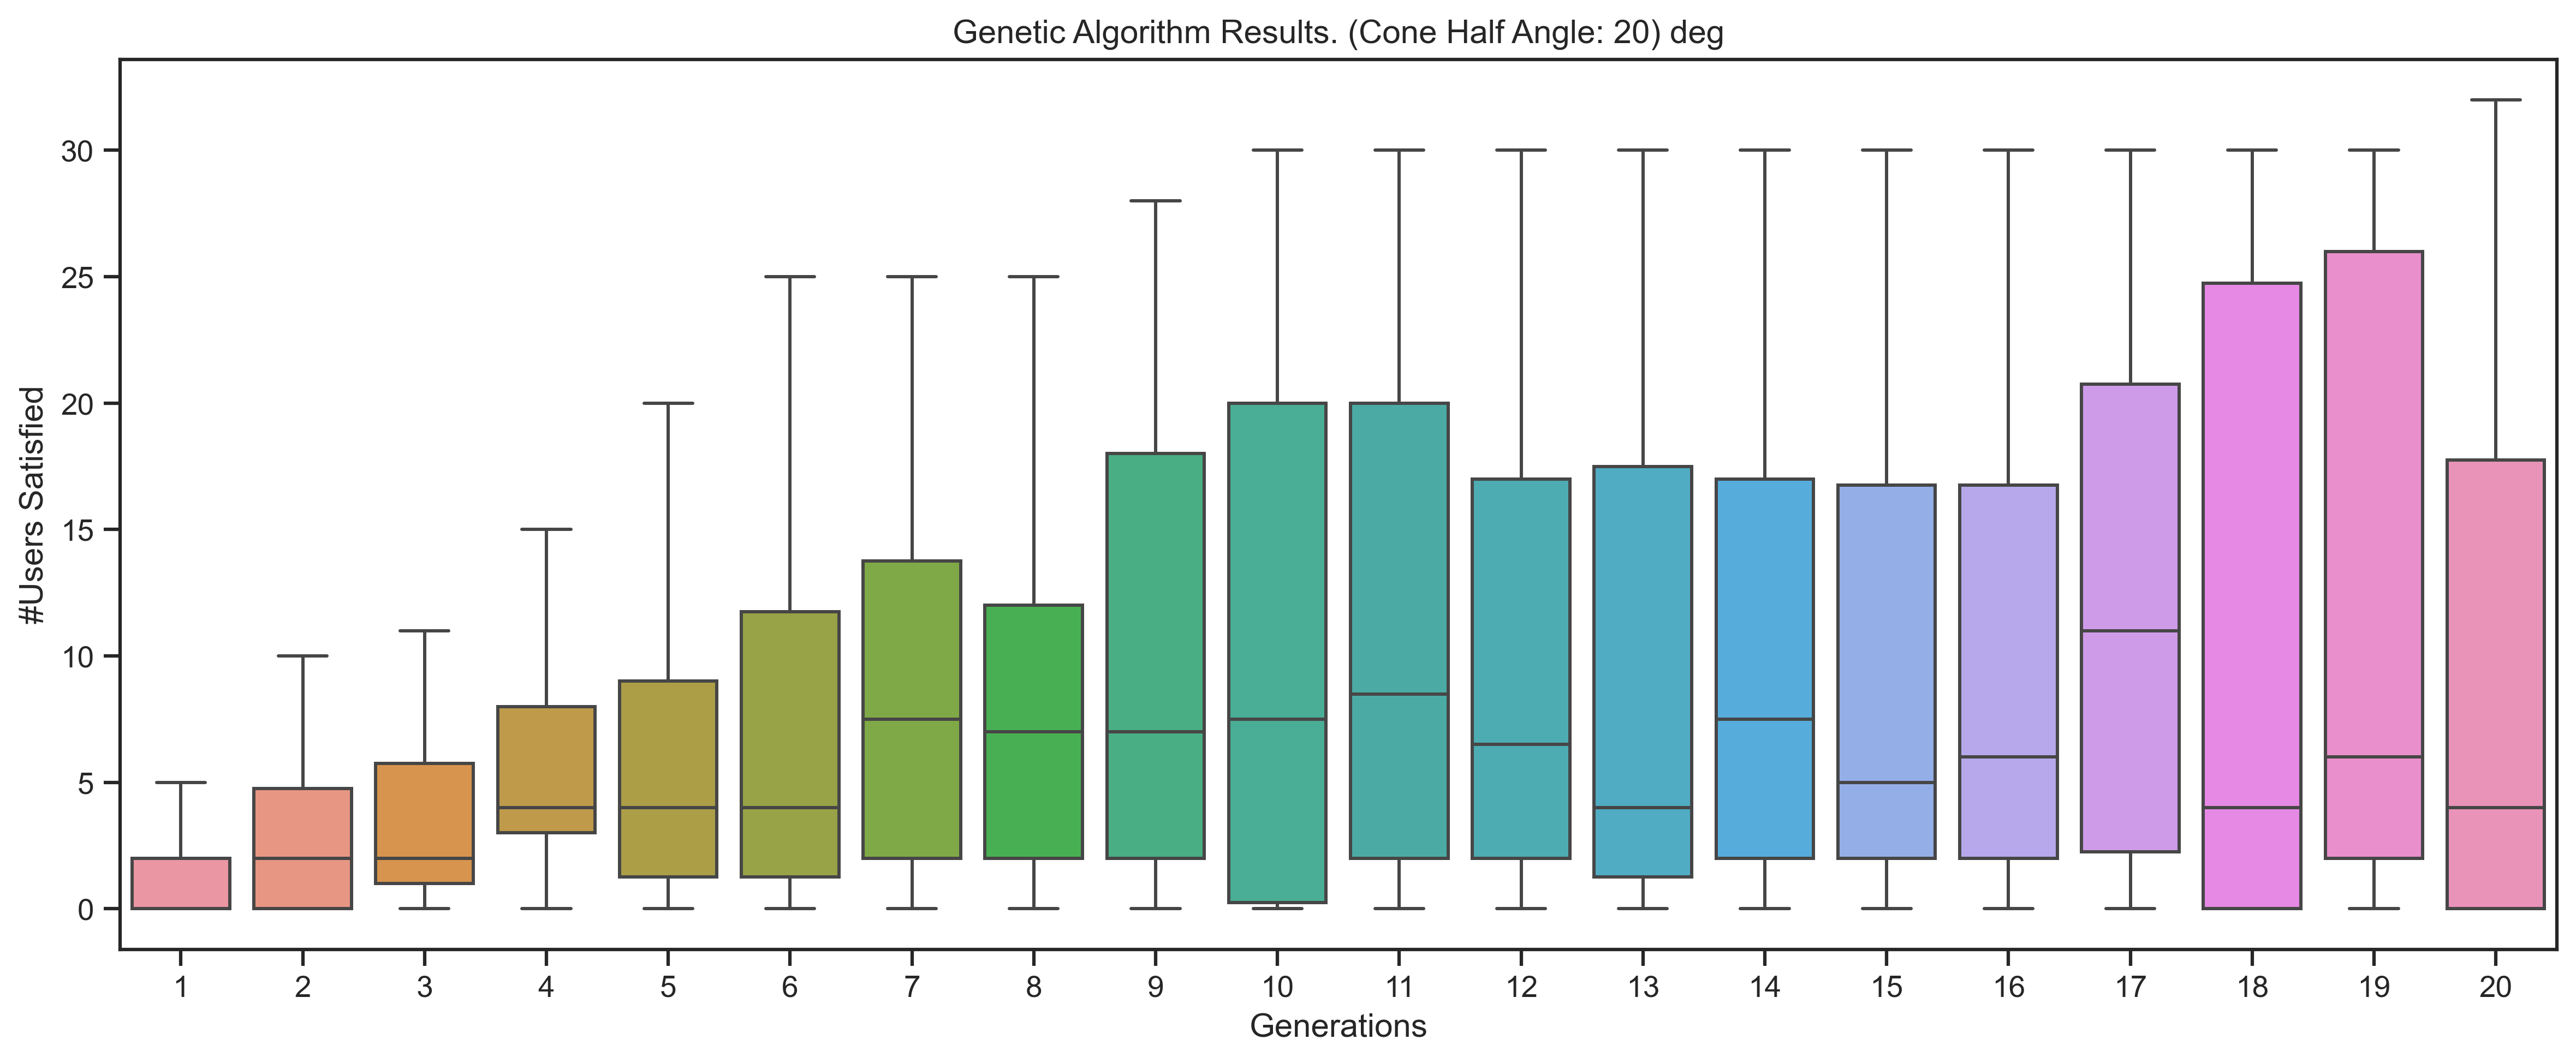

In [100]:
folders = Path('SRC').glob('**/*')
folders = [x for x in folders if x.is_dir() and x.name == 'Double']

for ii, folderDir in enumerate(folders):
     DirPath = folderDir
     folderDir = folderDir.as_posix()
     for i in range(20):
          idx = i
          df = pd.read_csv(folderDir + f'/gen_{idx}.csv')
          new_df = addGenIdx(df, idx=idx)
          if i == 0:
               DF = new_df
          else:
               DF = DF.append(new_df)
     # DF['Eval'] = DF['Eval'] / 60 # Minutes
     # fig, ax = plt.subplots(figsize=(13,5), dpi=100)
     # ax = sns.violinplot(ax=ax, x="Gen", y="Eval",
     #                #  col="Users", data=df)
     #                data=DF, inner=None)

     # # ax = sns.boxplot(ax=ax, x="Gen", y="Eval",
     # #                #  col="Users", data=df)
     # #                data=DF)


     # ax = sns.swarmplot(x="Gen", y="Eval", data=DF,
     #                    color="black", size=3,)
     # ax.set_ylabel('Users')
     # plt.show()
     fig, ax = plt.subplots(figsize=(8*2,3*2), dpi=120*3)
     # ax = sns.violinplot(ax=ax, x="Eval", y="Gen",
     #                #  col="Users", data=df)
     #                data=DF, inner=None)
     #                # data=DF)

     ax = sns.boxplot(ax=ax, x="Gen", y="Eval",
                    linewidth=1.2, 
                    fliersize=2, 
                    showfliers=False,
                    #  col="Users", data=df)
                    data=DF)


     # ax = sns.swarmplot(x="Gen", y="Eval", data=DF,
     #                color="black", size=3,)
     ax.set_ylabel('#Users Satisfied')
     ax.set_xlabel('Generations')
     ax.set_title(f'Genetic Algorithm Results. (Cone Half Angle: {DirPath.parent.name.split("S")[1]}) deg')
     ax.set_xticks(ticks=np.arange(20), labels=np.arange(20)+1,)
     
     plt.savefig(f'Images/Results_{ii}_{DirPath.parent.name.split("S")[1]}_deg.png')
     plt.show()

0 SRC/RES20/Double
1 SRC/RES30/Double
2 SRC/RES40/Double
3 SRC/RES50/Double
4 SRC/RES60/Double


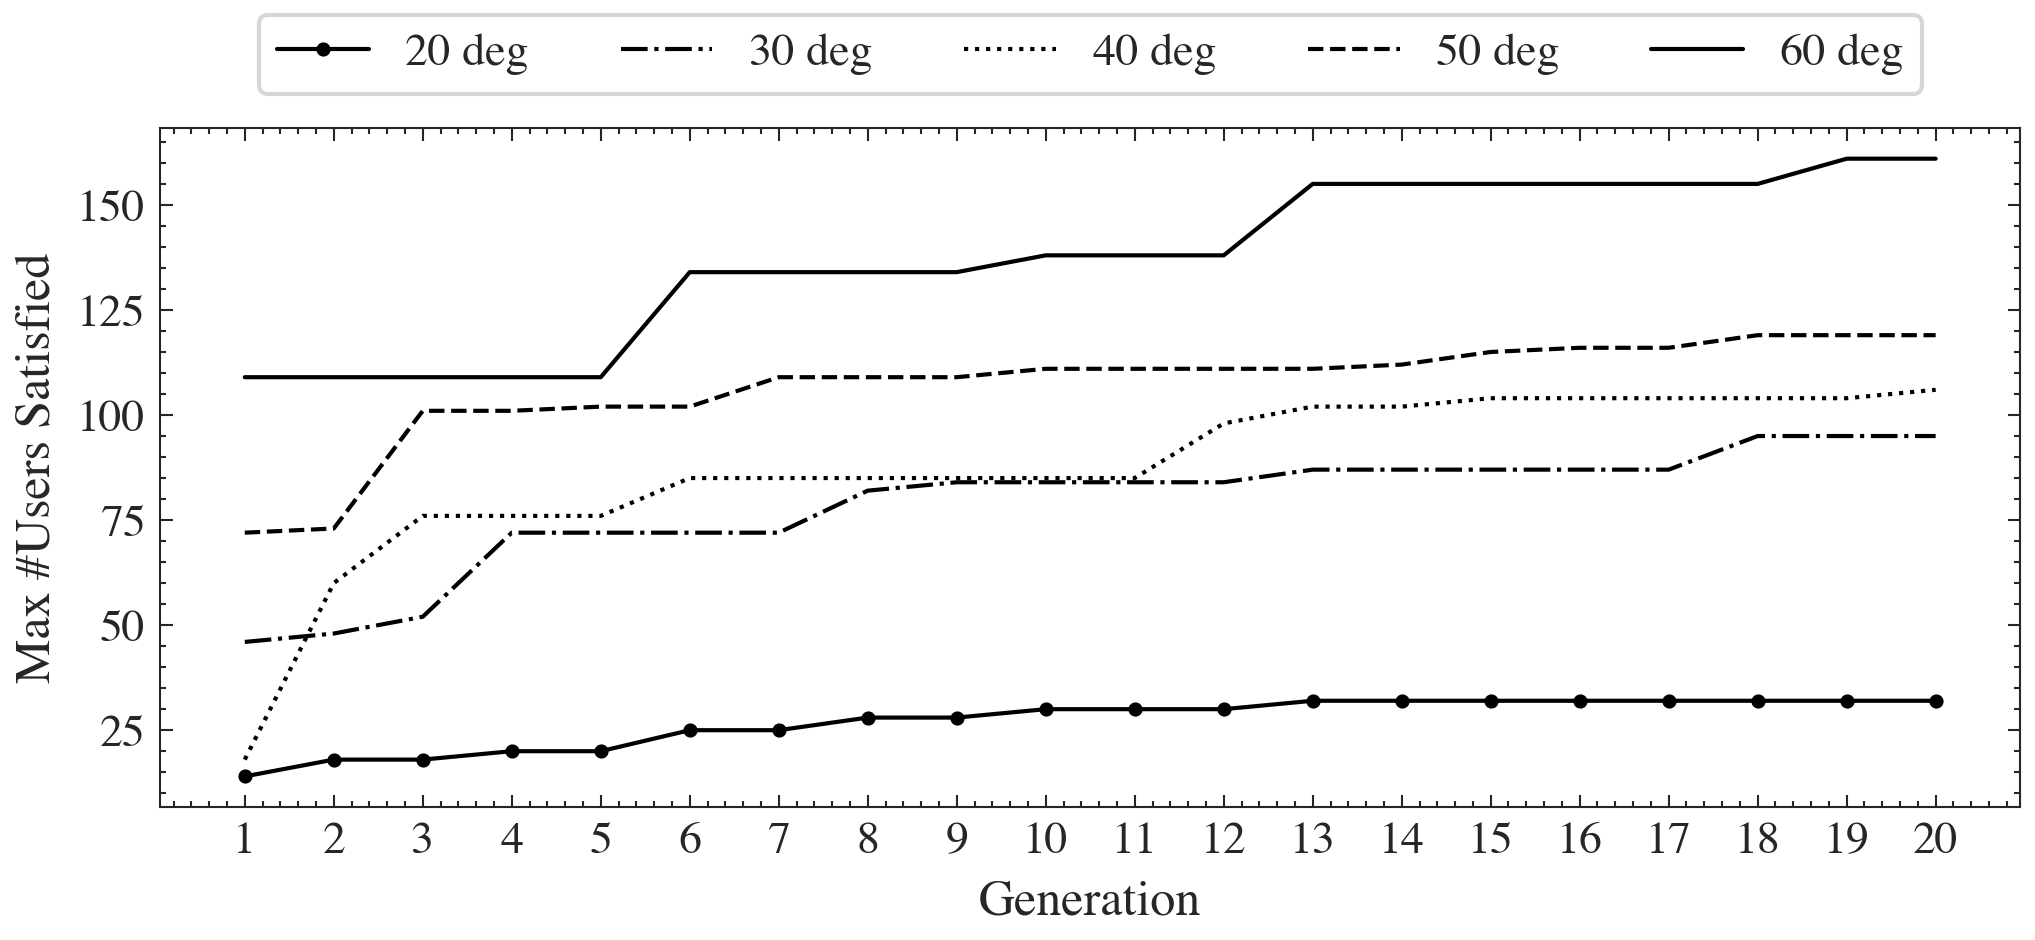

In [93]:
folders = Path('SRC').glob('**/*')
folders = [x for x in folders if x.is_dir() and x.name == 'Double']
folders.sort()
ls = {x:y for x,y in zip(range(5),['-','-.',':','--','-'])}
with plt.style.context(['science', 'ieee','no-latex']):
     plt.figure(figsize=(8,3), dpi=100*3)
     for idx,folder in enumerate(folders):
          print(idx, folder)
          MAXUSERS = []
          res_in_fold = [x for x in folder.glob('**/*') if x.is_file() and x.name.endswith('.csv')]
          res_in_fold.sort(key=lambda x: int(x.as_posix().split('.')[0].split('_')[1]))
          for jj, res in enumerate(res_in_fold):
                    df = pd.read_csv(res)
                    df.drop(columns='Unnamed: 0', inplace=True)
                    df.sort_values(by=['Eval'], ascending=False)
                    maxUser = df['Eval'].max()
                    if jj==0:
                         tmp=maxUser
                    if maxUser > tmp:
                         tmp=maxUser
                    MAXUSERS.append(tmp) # Depends on the metrics
          if idx!=0:
               plt.plot(MAXUSERS, label=f'{folder.parent.name.split("S")[1]} deg', color='black', linestyle=ls[idx])
          else:
               plt.plot(MAXUSERS, label=f'{folder.parent.name.split("S")[1]} deg', color='black', linestyle='-', marker='o', markersize=2.4)
     plt.legend(frameon=True, ncol=5, loc='upper center', bbox_to_anchor=(0.5, 1.2))
     plt.xlabel('Generation')
     plt.ylabel('Max #Users Satisfied')
     plt.xticks(ticks=np.arange(20), labels=np.arange(20)+1,)
     plt.savefig('Images/MaxUsersSatisfied.png')
     plt.show()